# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

C:\Users\wach9011\AppData\Local\Continuum\anaconda3_32bit\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
import numpy as np
#read in data
df_input = pd.read_csv("data/C2A2_data/BinnedCsvs_d18/a3fe47a453b0958158013a76033720a622264c58ab835c82a7eb95b9.csv")
df_input.head()

,ID,Date,Element,Data_Value
0,VEM00080415,2008-05-21,TMAX,319
1,RQC00664702,2011-08-03,TMIN,228
2,CUM00078369,2009-05-19,TMAX,289
3,RQC00669415,2008-03-30,TMAX,294
4,GP000078897,2012-03-30,TMAX,298


In [3]:
#print shape
df_input.shape

(411629, 4)

In [4]:
#remove ID column
df_input = df_input.drop("ID", axis=1)

In [5]:
#create date_index object that will be used for several tasks
date_index = pd.DatetimeIndex(df_input['Date'])

In [6]:
#remove the leap days: Feb 29
df_input = df_input[~((date_index.is_leap_year) & (date_index.month == 2) & (date_index.day == 29))]

In [7]:
#print shape
df_input.shape

(411395, 3)

In [8]:
#refresh the date_index
date_index = pd.DatetimeIndex(df_input['Date'])

In [9]:
#The main index will be the Monty-Day combination
df_input["Month"] = date_index.month
df_input["Day"] = date_index.day

In [10]:
df_2015 = df_input[date_index >= "2015-01-01"]
df_pst_10_yr = df_input[date_index < "2015-01-01"]

In [11]:
#The maximum temperatures records over the past 10 years
df_pst_10_yr_max = df_pst_10_yr[df_pst_10_yr["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
df_pst_10_yr_max = df_pst_10_yr_max / 10

In [12]:
#The minimum temperatures records over the past 10 years
df_pst_10_yr_min = df_pst_10_yr[df_pst_10_yr["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
df_pst_10_yr_min = df_pst_10_yr_min / 10

In [13]:
#The 2015 maximum temperatures records
df_2015_max = df_2015[df_2015["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
df_2015_max = df_2015_max / 10

In [14]:
#The 2015 minimum temperatures records
df_2015_min = df_2015[df_2015["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
df_2015_min = df_2015_min / 10

In [15]:
#where the records broken
max_rec_broken = (df_2015_max > df_pst_10_yr_max).as_matrix()
print(np.sum(max_rec_broken))
min_rec_broken = (df_2015_min < df_pst_10_yr_min).as_matrix()
print(np.sum(min_rec_broken))

97
40


C:\Users\wach9011\AppData\Local\Continuum\anaconda3_32bit\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\wach9011\AppData\Local\Continuum\anaconda3_32bit\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 10)

In [17]:
observation_axis = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')
observation_axis = np.array(list(map(pd.to_datetime, observation_axis)))

C:\Users\wach9011\AppData\Local\Continuum\anaconda3_32bit\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\wach9011\AppData\Local\Continuum\anaconda3_32bit\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\wach9011\AppData\Local\Continuum\anaconda3_32bit\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\wach9011\AppData\Local\Continuum\anaconda3_32

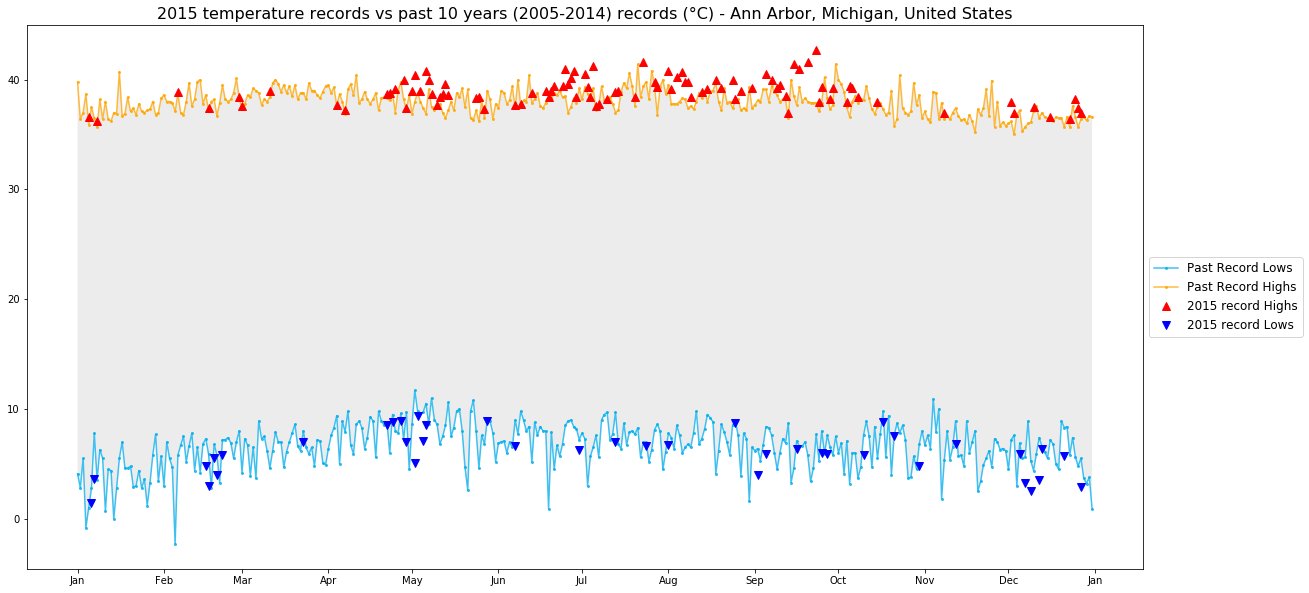

In [18]:
plt.title("2015 temperature records vs past 10 years (2005-2014) records (°C) - Ann Arbor, Michigan, United States", fontsize=16)

#Past record temperatures
plt.plot(observation_axis, df_pst_10_yr_min.as_matrix(), '-o', color='#00aeef', ms=2, alpha=0.75) 
plt.plot(observation_axis, df_pst_10_yr_max.as_matrix(), '-o', color='orange', ms=2, alpha=0.75) 

#2015 record temperatures
plt.plot(observation_axis[max_rec_broken], df_2015_max[max_rec_broken].as_matrix(), 'r^',
         observation_axis[min_rec_broken], df_2015_min[min_rec_broken].as_matrix(), 'bv', 
         ms=8, alpha=1.0)

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.legend(['Past Record Lows', 'Past Record Highs', "2015 record Highs", "2015 record Lows"], loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size':12})

plt.gca().fill_between(observation_axis, df_pst_10_yr_min, df_pst_10_yr_max, facecolor='grey', alpha=0.15)